### На основі файлу banking.csv, що міститься в репозиторії лекції, виконайте наступні дії:
### 1.	Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3)
### 2.	Застосуйте логістичну регресію для прогнозування цільової метрики у (ймовірність того, що клієнт відкриє вклад у банку)
### Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

Завантажуємо дані

In [6]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Визначаємо Х та у та видаляємо нечислові дані

In [7]:
y = data['y']
data.drop(['y'], axis=1, inplace=True)
numeric_cols = [i for i in data.columns if data[i].dtype in ['int64', 'float64']]
X = data[numeric_cols].copy()

Формуємо тестовий та тренувальний датасети (розмір тестової вибірки 0.3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

#### Застосовуємо логістичну регресію для прогнозування цільової метрики у

In [10]:
log_regression = LogisticRegression()

In [11]:
log_regression. fit (X_train,y_train)

C:\Python\Sturtup_Academy\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = log_regression.predict(X_test)

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10720,   261],
       [  829,   547]], dtype=int64)

#### Оцінюємо модель за допомогою матриці похибок, метрик precision, recall, F1-score

<AxesSubplot: >

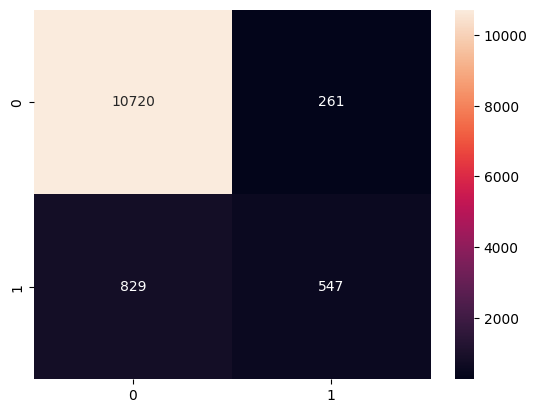

In [14]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [15]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Accuracy: 0.9117908877559278


In [16]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

Precision: 0.676980198019802
Recall: 0.39752906976744184
F1: [0.95162006 0.50091575]


#### Будуємо AUC-ROC криву для моделі.

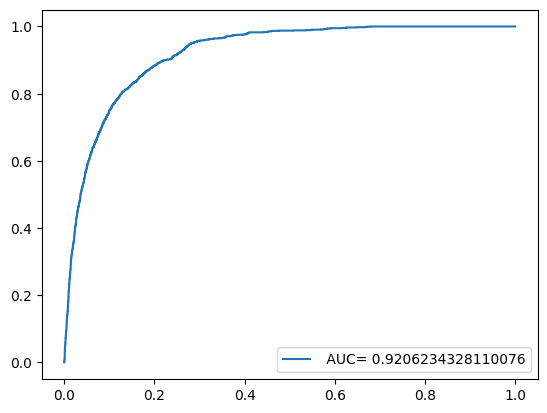

In [17]:
y_pred_proba = log_regression.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

#### Виходячи з отриманих нами даних та показників, можна зробити висновок, що наша модель є досить точною і може бути використана для прийняття відповідних рішень.